In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

In [75]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\halil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
df = pd.read_csv("dataset_create\\dataset\\enron1.csv")

In [77]:
df.head()

,label,label_num,text
0,spam,1,subject transfer manager vacancy secondary hig...
1,spam,1,subject fwd your needed soffttwares at rock bo...
2,ham,0,subject christmas tree farm pictures thanks ra...
3,spam,1,subject we have what you need cheapest pre scr...
4,ham,0,subject valero plants hey buddy how s it going...


In [78]:
df.tail()

,label,label_num,text
5167,spam,1,subject 75 off all vacations
5168,ham,0,subject re deal 339693 eol waha mary poorman 0...
5169,ham,0,subject fwd fw fwd picture worth a thousand wo...
5170,spam,1,subject paliourg no cost service to home owner...
5171,ham,0,subject feedback error 1 00 could one of you p...


In [79]:
df.iloc[0]

label                                                     spam
label_num                                                    1
text         subject transfer manager vacancy secondary hig...
Name: 0, dtype: object

In [80]:
stemmer = PorterStemmer()
corpus = []

stopwords_set = set(stopwords.words("english"))
stopwords_set.add("subject")
stopwords_set.add("hou")
stopwords_set.add("ect")
stopwords_set.add("enron")

for i in range(len(df)):
    text = df.iloc[i]['text']
    text = text.split() # Add this line to split the text into words
    text = [word for word in text if word.isalpha() and len(word) > 1]
    text = [stemmer.stem(word) for word in text if word not in stopwords_set]
    text = " ".join(text)
    corpus.append(text)
    
# Add 'corpus' as a new column in 'df'
df['transformed_text'] = corpus

In [81]:
df.head()

,label,label_num,text,transformed_text
0,spam,1,subject transfer manager vacancy secondary hig...,transfer manag vacanc secondari highli paid jo...
1,spam,1,subject fwd your needed soffttwares at rock bo...,fwd need soffttwar rock bottom prri ce bought ...
2,ham,0,subject christmas tree farm pictures thanks ra...,christma tree farm pictur thank ram tackett ma...
3,spam,1,subject we have what you need cheapest pre scr...,need cheapest pre scription internet
4,ham,0,subject valero plants hey buddy how s it going...,valero plant hey buddi go hope work dilig get ...


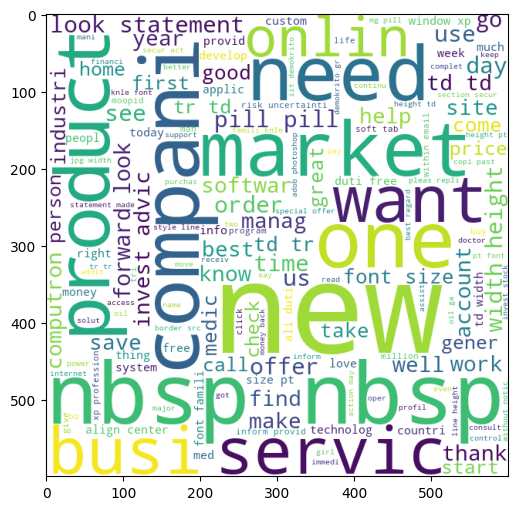

In [82]:
wc = WordCloud(width = 600, height = 600, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['label_num'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

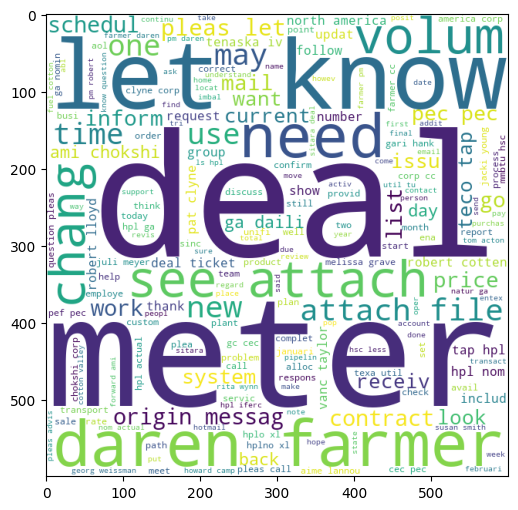

In [83]:
ham_wc = wc.generate(df[df['label_num'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

In [84]:
spam_plot = []
for sentence in df[df['label_num'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_plot.append(word)
        
filter_df = pd.DataFrame(Counter(spam_plot).most_common(40))

C:\Users\halil\AppData\Local\Temp\ipykernel_22436\2407996269.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filter_df, x=filter_df[0], y=filter_df[1], palette=blue_palette)


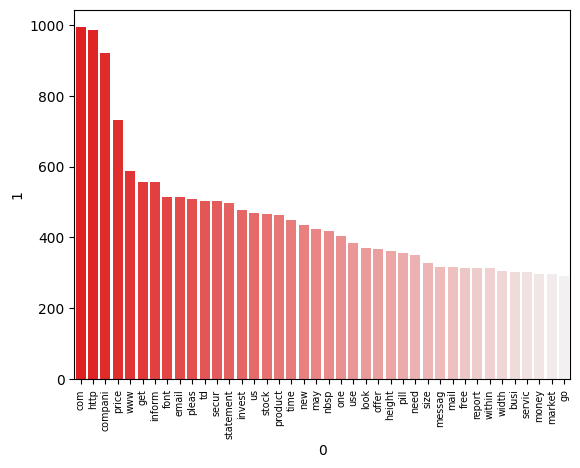

In [85]:
# Create a color palette from dark blue to light blue with 50 colors
blue_palette = sns.light_palette("red", n_colors=40, reverse=True)

# Create the bar plot
sns.barplot(data=filter_df, x=filter_df[0], y=filter_df[1], palette=blue_palette)

# Rotate x-axis labels and reduce their size
plt.xticks(rotation=90, fontsize='x-small')

plt.show()

In [86]:
ham_plot = []
for sentence in df[df['label_num'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_plot.append(word)
        
filter_df = pd.DataFrame(Counter(ham_plot).most_common(40))

C:\Users\halil\AppData\Local\Temp\ipykernel_22436\2843284837.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filter_df, x=filter_df[0], y=filter_df[1], palette=blue_palette)


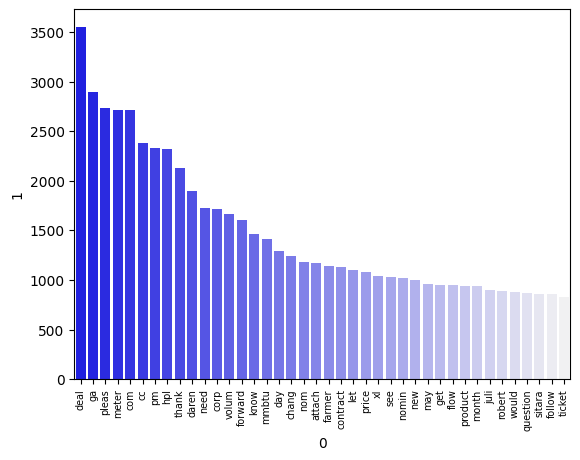

In [87]:
# Create a color palette from dark blue to light blue with 50 colors
blue_palette = sns.light_palette("blue", n_colors=40, reverse=True)

# Create the bar plot
sns.barplot(data=filter_df, x=filter_df[0], y=filter_df[1], palette=blue_palette)

# Rotate x-axis labels and reduce their size
plt.xticks(rotation=90, fontsize='x-small')

plt.show()

In [57]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus).toarray()
y = df["label_num"]

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

In [89]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')

clfs = {
    'LR': lrc,
}


from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

In [90]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For:  LR
Accuracy:  0.9594202898550724
Precision:  0.9288025889967637
